In [1]:
%reload_ext autoreload
%autoreload 2

In [11]:
i = 1
print(list(range(-i, -(12+i), 3)))

[]


In [1]:
weights = []
for root in self.odd_cluster_roots:
    cluster = self.clusters[root]
    for edge in cluster.boundary:
        weights.append(edge.data.properties['weight'])

min_weights = np.min(weights)

NameError: name 'self' is not defined

In [2]:
from soft_info import RepetitionCodeStimCircuit

code = RepetitionCodeStimCircuit(3, 4, False, True)
circ = code.circuits['0']
print(circ)

R 0 1 2 3 4
TICK
CX 0 1 2 3
TICK
CX 2 1 4 3
TICK
MR(0) 1 3
DETECTOR(1, 0, 5) rec[-2]
DETECTOR(3, 0, 5) rec[-1]
SHIFT_COORDS(0, 1)
REPEAT 3 {
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    MR(0) 1 3
    DETECTOR(1, 0) rec[-2] rec[-4]
    DETECTOR(3, 0) rec[-1] rec[-3]
    SHIFT_COORDS(0, 1)
}
MR(0) 0 2 4
DETECTOR(1, 0) rec[-3] rec[-2] rec[-5]
DETECTOR(3, 0) rec[-2] rec[-1] rec[-4]
OBSERVABLE_INCLUDE(0) rec[-1]


In [5]:
DEM = circ.detector_error_model()
DEM.diagram(type="match-graph-3d")


{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"}],"materials":[{"doubleSided":true,"name":"black","pbrMetallicRoughness":{"baseColorFactor":[0,0,0,1],"metallicFactor":1,"roughnessFactor":1}}],"meshes":[{"primitives":[{"attributes":{"POSITION":0},"material":0,"mode":6}]}],"nodes":[{"mesh":0,"translation":[3,0,15]},{"mesh":0,"translation":[9,0,15]},{"mesh":0,"translation":[3,3,0]},{"mesh":0,"translation":[9,3,0]},{"mesh":0,"translation":[3,6,0]},{"mesh":0,"translation":[9,6,0]},{"mesh":0,"translation":[3,9,0]},{"mesh":0,"translation":[9,9,0]},{"mesh":0,"translation":[3,12,0]},{"mesh":0,"translation":[9,12,0]}],"scene":0,"scenes":[{"nodes":[0,1,2,3,4,5,6,7,8,9]}]}

In [5]:
import numpy as np

# Example values for demonstration
error_indices = np.array([10, 500, 1500, 2500])  # Example error indices
nb_shots_per_job = 100  # Number of shots per job
num_jobs = 10  # Number of jobs in one subset
num_subsets = 5  # Number of subsets

# Calculate total shots per subset
shots_per_subset = nb_shots_per_job * num_jobs

# Initialize a matrix to count errors, shape is (num_subsets, num_jobs)
error_counts = np.zeros((num_subsets, num_jobs), dtype=int)

# Update counts
for error_index in error_indices:
    subset_index = error_index // shots_per_subset
    job_index = (error_index % shots_per_subset) // nb_shots_per_job
    error_counts[subset_index, job_index] += 1

print(error_counts)


[[1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [1]:
import numpy as np

# Assuming these variables are defined as before
error_indices = np.array([10, 500, 1500, 1501, 2500])  # Example error indices
nb_shots_per_job = 100  # Number of shots per job
num_jobs = 10  # Number of jobs in one subset
num_subsets = 5  # Number of subsets
job_ids = ['job_' + str(i) for i in range(num_jobs)]  # Example job IDs

# Calculate total shots per subset
shots_per_subset = nb_shots_per_job * num_jobs

# Initialize the dictionary to hold error lists for each job ID
errors_by_job_and_subset = {job_id: [[] for _ in range(num_subsets)] for job_id in job_ids}

# Populate the dictionary with error indicess
for error_index in error_indices:
    subset_index = error_index // shots_per_subset
    job_index = (error_index % shots_per_subset) // nb_shots_per_job
    job_id = job_ids[job_index]
    errors_by_job_and_subset[job_id][subset_index].append(error_index)

num_err_by_job = {job_id: [len(errors) for errors in errors_by_job_and_subset[job_id]] for job_id in job_ids}

print(errors_by_job_and_subset)
print(num_err_by_job)


{'job_0': [[10], [], [], [], []], 'job_1': [[], [], [], [], []], 'job_2': [[], [], [], [], []], 'job_3': [[], [], [], [], []], 'job_4': [[], [], [], [], []], 'job_5': [[500], [1500, 1501], [2500], [], []], 'job_6': [[], [], [], [], []], 'job_7': [[], [], [], [], []], 'job_8': [[], [], [], [], []], 'job_9': [[], [], [], [], []]}
{'job_0': [1, 0, 0, 0, 0], 'job_1': [0, 0, 0, 0, 0], 'job_2': [0, 0, 0, 0, 0], 'job_3': [0, 0, 0, 0, 0], 'job_4': [0, 0, 0, 0, 0], 'job_5': [1, 2, 1, 0, 0], 'job_6': [0, 0, 0, 0, 0], 'job_7': [0, 0, 0, 0, 0], 'job_8': [0, 0, 0, 0, 0], 'job_9': [0, 0, 0, 0, 0]}


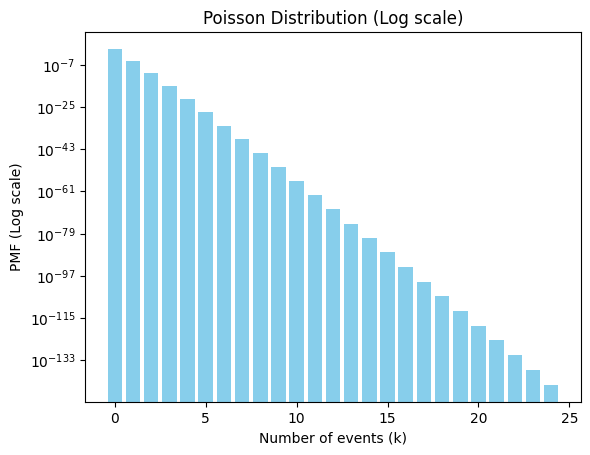

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters for the Poisson distribution
lambda_param = 0.00001 # Example lambda value

# Generate some data
data = np.arange(0, 25)  # Discrete range of x-values
pmf_data = poisson.pmf(data, lambda_param)  # Poisson PMF values

# Create a bar plot on a log scale
plt.bar(data, pmf_data, color='skyblue')

# Set the y-axis to a log scale
plt.yscale('log')

plt.title('Poisson Distribution (Log scale)')
plt.xlabel('Number of events (k)')
plt.ylabel('PMF (Log scale)')
plt.show()
